# 09 Evaluation 

# Contents

1. Overview of modelling roadmap
2. Key feature engineering and preprocessing to improve performance
3. Optimisation 
4. Evaluating model performance
5. Recommendations for future improvement
6. Comparison and next steps

# 1. Overview of modelling roadmap

### Here's a recap of the 4 models we constructed, and key techniques and hyperparameter tuning:

![Model Roadmap](../visualisations/model_roadmap.png)

Throughout this process, we developed and evaluated four different models, each applying different machine learning techniques and hyperparameter tuning strategies. The models we explored include:

- **Logistic Regression**: Focused on addressing multicollinearity and feature selection.
- **Decision Tree**: Optimized hyperparameters through coarse analysis and cross-validation.
- **Random Forest**: Further optimization, leveraging ensemble techniques.
- **Neural Network**: Tuning of learning rate, regularization, and epochs.

In this notebook, we will provide more detailed discussions on how these models were built, the preprocessing applied, and the optimization techniques used to improve performance.

# 2. Key feature engineering and preprocessing to improve performance

Below is a summary of the key feature engineering and preprocessing techniques that were applied, along with their rationale for improving model performance:

| **Technique**                                        | **Rationale/Impact on Model Performance**                                  |
|------------------------------------------------------|---------------------------------------------------------------------------|
| Filtering dataset for employed individuals only      | Focuses on relevant cases to improve model predictions.                   |
| Limiting initial feature space to job-related variables | Ensures the model is trained on features with higher predictive power.     |
| Binary coding of target variable ('High Satisfaction' and 'Low Satisfaction') based on distribution analysis | Simplifies the target variable for classification tasks.                   |
| Engineering 'job duration' variable                  | Provides a meaningful continuous feature representing employment tenure.   |
| Aggregation of categorical variables (e.g., ethnicity, location, marital status) based on distribution analysis | Reduces sparsity and improves interpretability while preserving important distinctions. |
| Standard Scaler                                       | Standardises feature ranges to avoid dominance of certain features during training. |
| One Hot Encoding                                      | Converts categorical variables into binary vectors for machine learning algorithms to interpret. |
| SMOTE (Synthetic Minority Over-sampling Technique)    | Addresses the imbalance of the target variable by creating synthetic samples for the minority class. |

# 3. Optimisation

We applied a variety of optimisation strategies tailored to each model. Below is a high-level summary of the optimisation techniques used:

 **Model**               | **Optimisation Techniques**                                                                                                                                   |
|-------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Logistic Regression**  | - Addressed multicollinearity by calculating Variance Inflation Factors (VIF) to remove highly correlated features.<br>- Applied backward selection for feature selection based on p-values. |
| **Decision Tree**        | - Key hyperparameters optimised: max depth, max features, and minimum samples leaf.<br>- Coarse analysis with 5-fold cross-validation to balance computational effort and performance tuning.<br>- Applied `RandomizedSearchCV` for more robust hyperparameter search. |
| **Random Forest**        | - Same hyperparameters as Decision Tree, with additional tuning of the number of estimators (i.e., number of trees).<br>- Coarse analysis with 5-fold cross-validation.|
| **Neural Network**       | - Tuned learning rate, regularization strength, and number of epochs.<br>- Coarse analysis used for initial learning rate adjustments.<br>- 5-fold cross-validation applied selectively to reduce computational intensity. |

### Limitations

While we aimed to apply rigorous optimisation techniques, certain computational constraints led us to adapt our strategy:
- **RandomizedSearchCV** was not always applied due to the **computational intensity** associated with large hyperparameter spaces.
- In the case of the **Neural Network**, we did not always use 5-fold cross-validation. Instead, we applied a **validation split (0.2)** during training to estimate the model’s performance on unseen data and avoid data leakage. This trade-off allowed for a more efficient yet reliable optimisation process.

# 4. Evaluating model performance

So given what we know about the above steps taken to improve performance across all models, how did our models do?

Let's first begin by loading our best performing models:

In [110]:
import pandas as pd

In [109]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

# Load models

best_model_logit = joblib.load('../models/best_model_logit.pkl')
best_model_dt = joblib.load('../models/best_model_DT.pkl')
best_estimator_rf = joblib.load('../models/best_estimator_rf.pkl')
best_model_rf = joblib.load('../models/best_model_rf.pkl')
best_model_neuralnet = load_model('../models/best_model_nn.keras')

And the necessary variables to calculate key evaluation metrics:

In [111]:
import joblib

# Load the saved data
X_train_resampled_df = joblib.load('../preprocessed_variables/X_train_resampled_df.pkl')
X_test_scaled_df = joblib.load('../preprocessed_variables/X_test_scaled_df.pkl')
y_train_resampled = joblib.load('../preprocessed_variables/y_train_resampled.pkl')
y_test = joblib.load('../preprocessed_variables/y_test.pkl')

# Verify the loaded data
print(X_train_resampled_df.shape, y_train_resampled.shape)
print(X_test_scaled_df.shape, y_test.shape)


(370990, 325) (370990,)
(88597, 325) (88597,)


In [114]:
# List of model names for easy reference
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Neural Network']

# (a) Evaluating train and test accuracy

#### When we talk about accuracy, we can look at our models' train accuracy, versus test accuracy. Test accuracy refers to our model's ability to generalise to unseen data. So how did each of our models constructed perform in this regard?

In [115]:
import seaborn as sns

Loading and plotting train/test accuracies across our 4 models:

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.7s finished
/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_3913/2031786391.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=train_accuracies, ax=axes[0], palette=palette)
/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_3913/2031786391.py:49: FutureWarning: 

Passing `palet

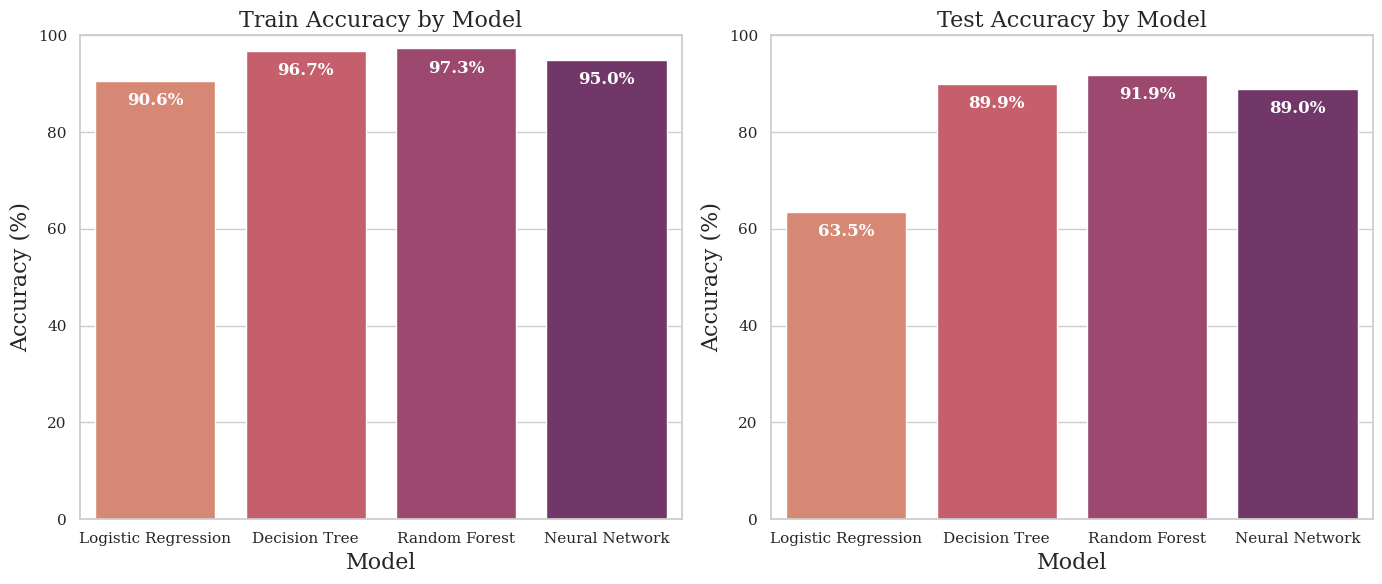

In [116]:
# Load accuracies from logit model (rounded to 1 decimal place)
train_accuracy_logit = round(joblib.load('../models/pct_accuracy_train_iter4.pkl') * 100, 1)
test_accuracy_logit = round(joblib.load('../models/pct_accuracy_test_iter4.pkl') * 100, 1)

# Decision Tree
train_accuracy_dt = round(best_model_dt.score(X_train_resampled_df, y_train_resampled) * 100, 1)
test_accuracy_dt = round(best_model_dt.score(X_test_scaled_df, y_test) * 100, 1)

# Random Forest
train_accuracy_rf = round(best_model_rf.score(X_train_resampled_df, y_train_resampled) * 100, 1)
test_accuracy_rf = round(best_model_rf.score(X_test_scaled_df, y_test) * 100, 1)

# Neural Network
train_accuracy_nn = round(best_model_neuralnet.evaluate(X_train_resampled_df, y_train_resampled, verbose=0)[1] * 100, 1)
test_accuracy_nn = round(best_model_neuralnet.evaluate(X_test_scaled_df, y_test, verbose=0)[1] * 100, 1)

# Prepare data for plotting
train_accuracies = [train_accuracy_logit, train_accuracy_dt, train_accuracy_rf, train_accuracy_nn]
test_accuracies = [test_accuracy_logit, test_accuracy_dt, test_accuracy_rf, test_accuracy_nn]

# Set up the seaborn style and color palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("flare", len(model_names))

# Set the professional font for the entire plot
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'legend.fontsize': 12
})

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Train Accuracies
sns.barplot(x=model_names, y=train_accuracies, ax=axes[0], palette=palette)
axes[0].set_title('Train Accuracy by Model')
axes[0].set_ylim(0, 100)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy (%)')

# Add data labels for train accuracy (inside the bars)
for i, v in enumerate(train_accuracies):
    axes[0].text(i, v - 5 if v > 5 else v + 2, f'{v:.1f}%', ha='center', color='white' if v > 5 else 'black', fontweight='bold')

# Plot Test Accuracies
sns.barplot(x=model_names, y=test_accuracies, ax=axes[1], palette=palette)
axes[1].set_title('Test Accuracy by Model')
axes[1].set_ylim(0, 100)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Accuracy (%)')

# Add data labels for test accuracy (inside the bars)
for i, v in enumerate(test_accuracies):
    axes[1].text(i, v - 5, f'{v:.1f}%', ha='center', color='white', fontweight='bold')

# Adjust the layout to prevent the legend from overlapping
plt.tight_layout()
plt.show()

### Key Insights from Model Performance

- **Train Accuracy:**
  - The **Random Forest** model has the highest train accuracy at **97.3%**, closely followed by the **Decision Tree** at **96.7%** and the **Neural Network** at **95.0%**. These high values suggest that the models were able to learn well from the training data.
  - **Logistic Regression** has the lowest train accuracy at **90.6%**, which is still reasonably high but indicates a more conservative fit compared to tree-based methods and the Neural Network.

- **Test Accuracy:**
  - The **Random Forest** achieves the highest test accuracy at **91.9%**, outperforming all other models, showing its strong generalisation to unseen data.
  - The **Decision Tree** performs slightly worse at **89.9%**, which might indicate some overfitting compared to the Random Forest.
  - The **Neural Network** shows promising results with a test accuracy of **89.0%**, closely following the Decision Tree but with slightly less generalization power.
  - **Logistic Regression** shows a significant drop in test accuracy to **63.5%**, suggesting it may not capture the underlying relationships in the data as well as the more complex models, particularly for this dataset.

- **Generalisation and Overfitting:**
  - The **Decision Tree** and **Random Forest** models show relatively small differences between train and test accuracy, suggesting good generalisation to unseen data.
  - The **Neural Network**, although slightly lower in test accuracy, shows competitive generalisation with minimal overfitting, as the gap between train and test accuracy remains small.
  - **Logistic Regression** shows the largest drop in performance from train to test, indicating potential **underfitting** and suggesting that it struggles with the complexity of the data.

### Summary:

The **Random Forest** model emerges as the best performer, balancing high train and test accuracy, with minimal overfitting. The **Neural Network** also demonstrates competitive performance, and with further tuning, could potentially improve. **Logistic Regression**, while having decent training performance, underperforms significantly on the test set, making it less suitable for this dataset without further optimization.


# (b) What about each model's classification accuracy?

Let's generate the classifiaction report for each of our models first:

In [117]:
from sklearn.metrics import classification_report

# Make predictions on the test set using the entire pipeline (this ensures feature selection is applied)
y_test_pred_rf = best_model_rf.predict(X_test_scaled_df)
# Generate classification report for the Random Forest model
class_report_rf = classification_report(y_test, y_test_pred_rf, output_dict=True)  # Output as a dictionary

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.7s finished


In [118]:
# Load the aligned test data
X_test_final_const_aligned = joblib.load('../preprocessed_variables/X_test_final_const_aligned.pkl')

In [119]:
# Similarly, for other models (Decision Tree, Logistic Regression, Neural Network)
y_test_pred_dt = best_model_dt.predict(X_test_scaled_df)
class_report_dt = classification_report(y_test, y_test_pred_dt, output_dict=True)

y_test_pred_logit = np.where(best_model_logit.predict(X_test_final_const_aligned) > 0.5, 1, 0)
class_report_logit = classification_report(y_test, y_test_pred_logit, output_dict=True)

y_test_pred_nn = (best_model_neuralnet.predict(X_test_scaled_df) > 0.5).astype(int)
class_report_nn = classification_report(y_test, y_test_pred_nn, output_dict=True)

2769/2769 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step


## Understanding classification accuracy for negative class: 'Low job satisfaction':

We can first evaluate how well our models dealt with classifying individuals with 'Low job satisfaction'. In our unseen data, this was 'Class 0' and the minority class.

We plot the results below:

/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_3913/4035320974.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_data, x='Metric', y='Score', palette=flare_palette, ax=ax)
/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_3913/4035320974.py:56: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=model_data, x='Metric', y='Score', palette=flare_palette, ax=ax)
/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_3913/4035320974.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_data, x='Metric', y='Score', palette=flare_palette, ax=ax)
/var/folders/d8/f47z80nj3835j2cjhqsrtc6r00

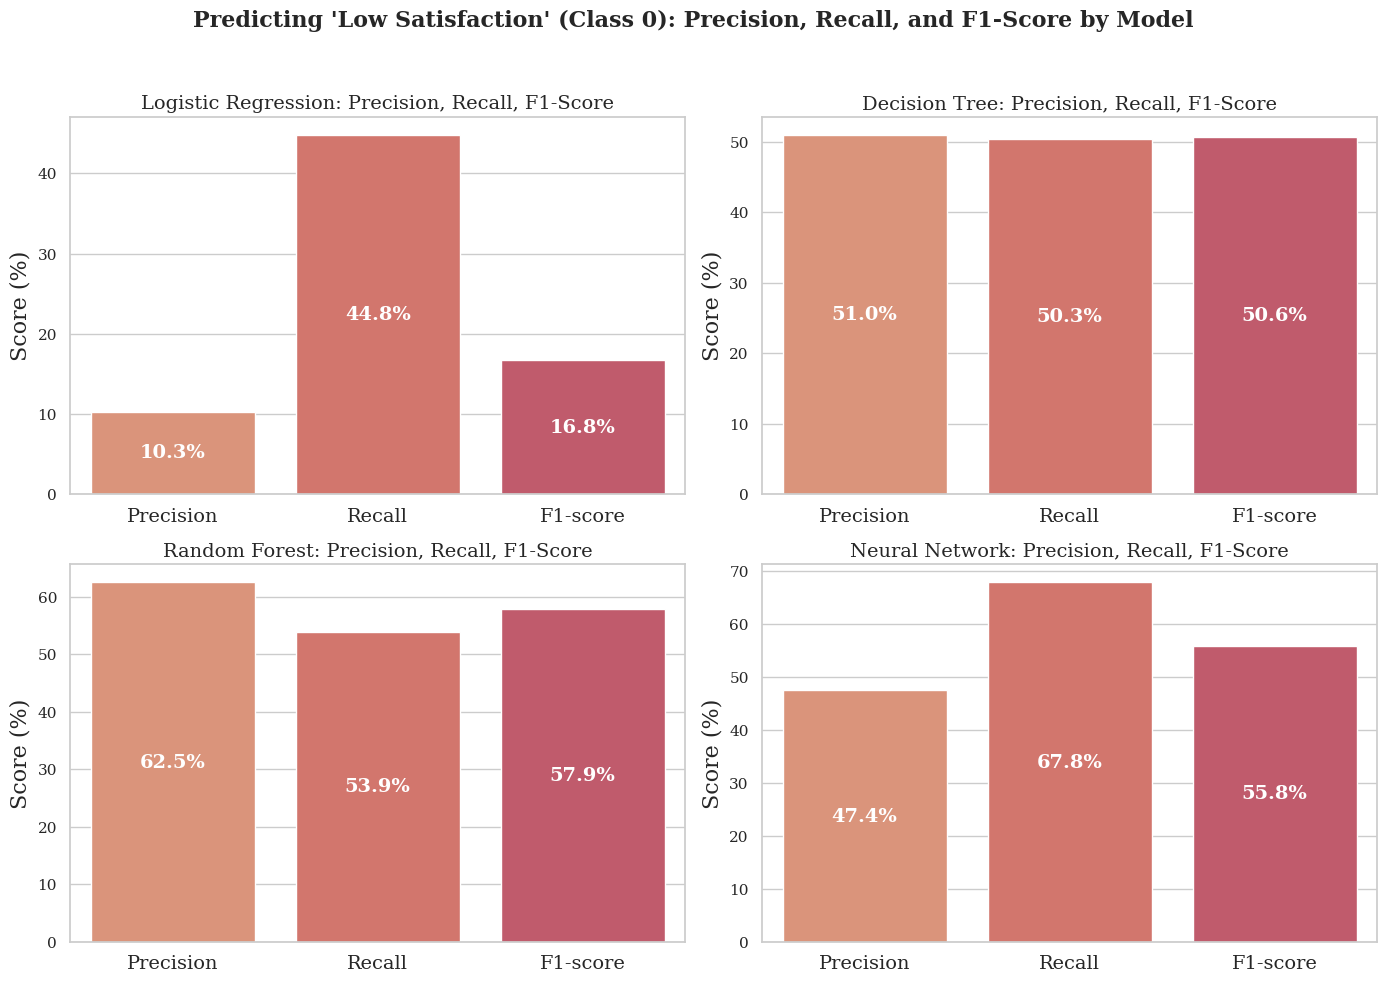

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract precision, recall, and f1-score for class '0' (Low satisfaction)
metrics_class_0 = {
    'Logistic Regression': {
        'Precision': class_report_logit['0']['precision'] * 100,
        'Recall': class_report_logit['0']['recall'] * 100,
        'F1-score': class_report_logit['0']['f1-score'] * 100
    },
    'Decision Tree': {
        'Precision': class_report_dt['0']['precision'] * 100,
        'Recall': class_report_dt['0']['recall'] * 100,
        'F1-score': class_report_dt['0']['f1-score'] * 100
    },
    'Random Forest': {
        'Precision': class_report_rf['0']['precision'] * 100,
        'Recall': class_report_rf['0']['recall'] * 100,
        'F1-score': class_report_rf['0']['f1-score'] * 100
    },
    'Neural Network': {
        'Precision': class_report_nn['0']['precision'] * 100,
        'Recall': class_report_nn['0']['recall'] * 100,
        'F1-score': class_report_nn['0']['f1-score'] * 100
    }
}

# Convert the metrics dictionary to a DataFrame for plotting
metrics_df_class_0 = pd.DataFrame(metrics_class_0).T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
metrics_df_class_0.columns = ['Model', 'Metric', 'Score']

# Set up the seaborn theme and palette
sns.set_theme(style="whitegrid")
flare_palette = sns.color_palette("flare", as_cmap=False)
closely_related_palette = sns.color_palette("crest", as_cmap=False)

# Set font size and style
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'serif',
    'axes.labelsize': 16,
    'axes.titlesize': 14,
    'legend.fontsize': 14
})

# Create subplots for each model, comparing Precision, Recall, and F1-score
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid for the four models

# List of models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Neural Network']

# Loop through models and create a subplot for each
for ax, model in zip(axes.flatten(), models):
    model_data = metrics_df_class_0[metrics_df_class_0['Model'] == model]
    sns.barplot(data=model_data, x='Metric', y='Score', palette=flare_palette, ax=ax)
    
    # Add data labels inside the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=14, color='white', fontweight='bold')
    
    # Set x-axis labels (ticks) to a bigger size
    ax.tick_params(axis='x', labelsize=14)  # Adjust labelsize for x-axis labels

    # Set title and labels
    ax.set_title(f'{model}: Precision, Recall, F1-Score', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Score (%)')

# Adjust layout to increase vertical space between rows
plt.subplots_adjust(hspace=0.2)  # Increase hspace to add more vertical space

# Adjust layout and add an overall title
plt.suptitle("Predicting 'Low Satisfaction' (Class 0): Precision, Recall, and F1-Score by Model", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to leave space for the overall title
plt.show()


### Key Insights from Precision, Recall, and F1-Score for 'Low Satisfaction' (Class 0)

- **Logistic Regression:**
  - **Precision**: 10.3%
  - **Recall**: 44.8%
  - **F1-Score**: 16.8%
  
  The **Logistic Regression** model significantly underperforms in terms of precision and F1-score. The model struggles with predicting 'Low Satisfaction' (Class 0), only achieving **10.3% precision** and a **44.8% recall**. This suggests that while the model can identify some 'Low Satisfaction' cases, it is prone to many false positives, and overall effectiveness is low as indicated by the **F1-score of 16.8%**.

- **Decision Tree:**
  - **Precision**: 51.0%
  - **Recall**: 50.3%
  - **F1-Score**: 50.6%
  
  The **Decision Tree** shows a more balanced performance with **precision and recall both around 50%**. This results in an **F1-score of 50.6%**, indicating that the model performs reasonably well at capturing 'Low Satisfaction' cases while maintaining an acceptable balance between precision and recall.

- **Random Forest:**
  - **Precision**: 62.5%
  - **Recall**: 53.9%
  - **F1-Score**: 57.9%
  
  The **Random Forest** model performs the best among the models, achieving a **precision of 62.5%** and a **recall of 53.9%**, resulting in an **F1-score of 57.9%**. The model is not only able to capture more 'Low Satisfaction' cases but does so with fewer false positives, reflected in the higher precision.

- **Neural Network:**
  - **Precision**: 47.4%
  - **Recall**: 67.8%
  - **F1-Score**: 55.8%
  
  The **Neural Network** shows strong **recall** at **67.8%**, meaning it captures more 'Low Satisfaction' cases than other models. However, this comes at the cost of **precision (47.4%)**, meaning the model tends to overpredict 'Low Satisfaction,' resulting in more false positives. The overall **F1-score of 55.8%** is close to that of the Random Forest, showing competitive performance.

### Summary:
- **Random Forest** performs the best overall, balancing precision and recall effectively with the highest F1-score of **57.9%**.
- The **Neural Network** excels in recall, identifying more 'Low Satisfaction' cases, but with a trade-off in precision, leading to a slightly lower F1-score.
- **Decision Tree** shows balanced, but lower, performance in both precision and recall, while **Logistic Regression** struggles significantly in this task with very low precision and F1-scores.


## And now, how do our models fare with classifying 'High Job Satisfaction'?

We now plot the same below, to undertsand how well our models dealth with understanding 'Highly Satisfied' individuals:

/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_3913/569064530.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_data, x='Metric', y='Score', palette=flare_palette, ax=ax)
/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_3913/569064530.py:56: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=model_data, x='Metric', y='Score', palette=flare_palette, ax=ax)
/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_3913/569064530.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_data, x='Metric', y='Score', palette=flare_palette, ax=ax)
/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000g

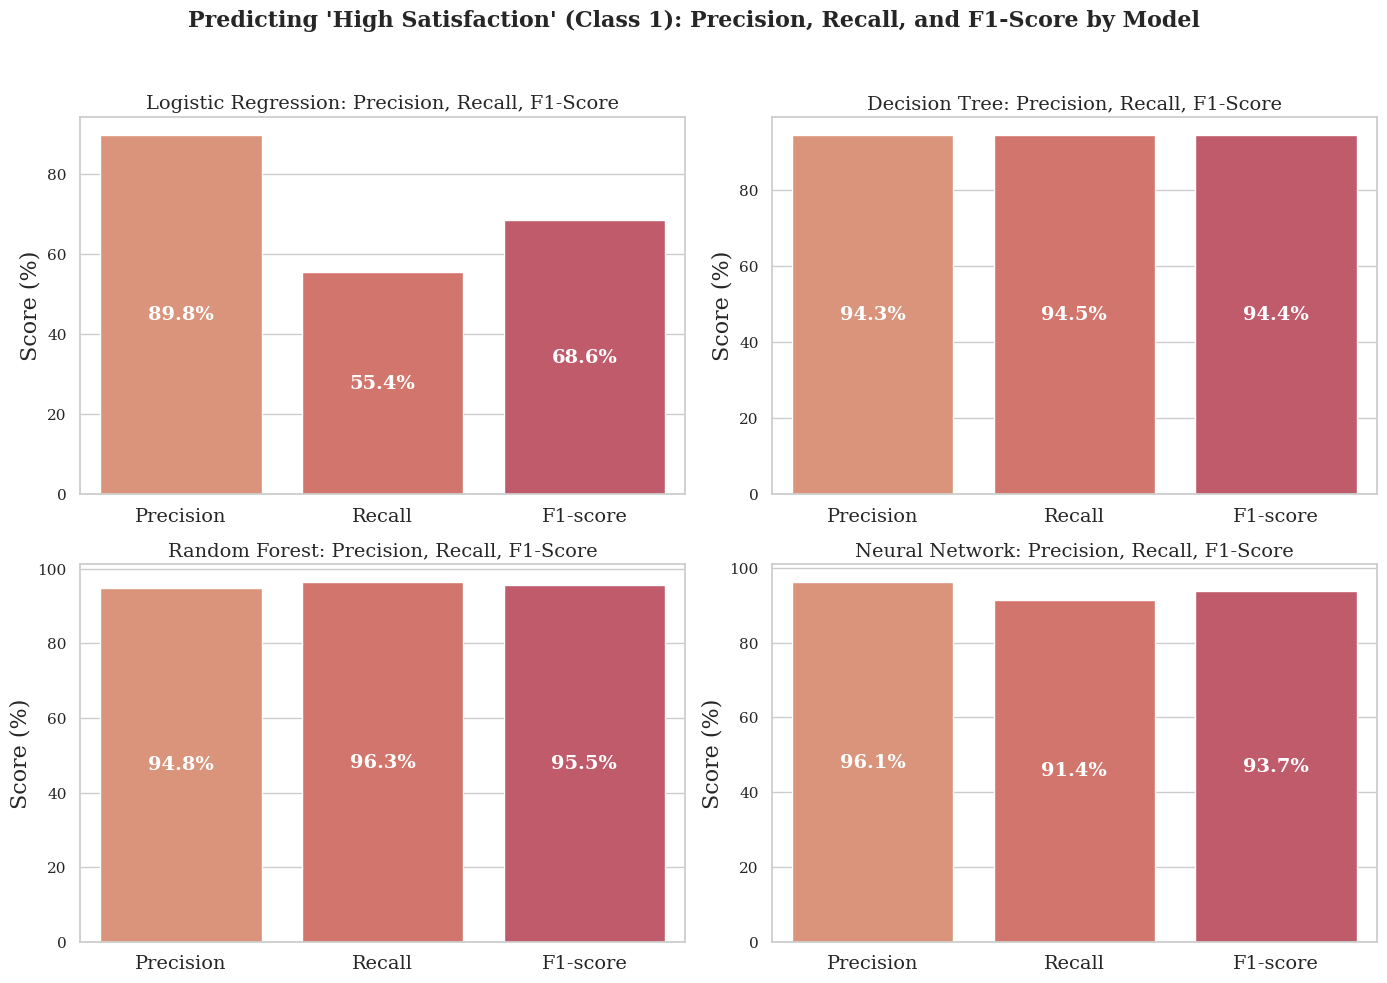

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract precision, recall, and f1-score for class '0' (Low satisfaction)
metrics_class_1 = {
    'Logistic Regression': {
        'Precision': class_report_logit['1']['precision'] * 100,
        'Recall': class_report_logit['1']['recall'] * 100,
        'F1-score': class_report_logit['1']['f1-score'] * 100
    },
    'Decision Tree': {
        'Precision': class_report_dt['1']['precision'] * 100,
        'Recall': class_report_dt['1']['recall'] * 100,
        'F1-score': class_report_dt['1']['f1-score'] * 100
    },
    'Random Forest': {
        'Precision': class_report_rf['1']['precision'] * 100,
        'Recall': class_report_rf['1']['recall'] * 100,
        'F1-score': class_report_rf['1']['f1-score'] * 100
    },
    'Neural Network': {
        'Precision': class_report_nn['1']['precision'] * 100,
        'Recall': class_report_nn['1']['recall'] * 100,
        'F1-score': class_report_nn['1']['f1-score'] * 100
    }
}

# Convert the metrics dictionary to a DataFrame for plotting
metrics_df_class_1 = pd.DataFrame(metrics_class_1).T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
metrics_df_class_1.columns = ['Model', 'Metric', 'Score']

# Set up the seaborn theme and palette
sns.set_theme(style="whitegrid")
flare_palette = sns.color_palette("flare", as_cmap=False)
closely_related_palette = sns.color_palette("crest", as_cmap=False)

# Set font size and style
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'serif',
    'axes.labelsize': 16,
    'axes.titlesize': 14,
    'legend.fontsize': 14
})

# Create subplots for each model, comparing Precision, Recall, and F1-score
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid for the four models

# List of models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Neural Network']

# Loop through models and create a subplot for each
for ax, model in zip(axes.flatten(), models):
    model_data = metrics_df_class_1[metrics_df_class_1['Model'] == model]
    sns.barplot(data=model_data, x='Metric', y='Score', palette=flare_palette, ax=ax)
    
    # Add data labels inside the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=14, color='white', fontweight='bold')
    
    # Set x-axis labels (ticks) to a bigger size
    ax.tick_params(axis='x', labelsize=14)  # Adjust labelsize for x-axis labels

    # Set title and labels
    ax.set_title(f'{model}: Precision, Recall, F1-Score', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Score (%)')

# Adjust layout to increase vertical space between rows
plt.subplots_adjust(hspace=0.2)  # Increase hspace to add more vertical space

# Adjust layout and add an overall title
plt.suptitle("Predicting 'High Satisfaction' (Class 1): Precision, Recall, and F1-Score by Model", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to leave space for the overall title
plt.show()


### Key Insights from Precision, Recall, and F1-Score for 'High Satisfaction' (Class 1)

- **Logistic Regression:**
  - **Precision**: 89.8%
  - **Recall**: 55.4%
  - **F1-Score**: 68.6%
  
  The **Logistic Regression** model demonstrates high **precision (89.8%)**, meaning that when it predicts 'High Satisfaction,' it is often correct. However, the **recall** is relatively low at **55.4%**, indicating the model struggles to capture all actual 'High Satisfaction' cases. As a result, the **F1-score** is moderate at **68.6%**, showing a trade-off between precision and recall.

- **Decision Tree:**
  - **Precision**: 94.3%
  - **Recall**: 94.5%
  - **F1-Score**: 94.4%
  
  The **Decision Tree** performs strongly across all metrics, with **precision and recall both around 94%**, leading to an **F1-score of 94.4%**. This indicates that the Decision Tree can both accurately and consistently predict 'High Satisfaction' with minimal false positives or false negatives.

- **Random Forest:**
  - **Precision**: 94.8%
  - **Recall**: 96.3%
  - **F1-Score**: 95.5%
  
  The **Random Forest** performs the best among all models for 'High Satisfaction,' achieving the highest **recall (96.3%)** and **F1-score (95.5%)**, as well as excellent **precision (94.8%)**. This suggests that the Random Forest model is very reliable in identifying 'High Satisfaction' cases and does so with high precision.

- **Neural Network:**
  - **Precision**: 96.1%
  - **Recall**: 91.4%
  - **F1-Score**: 93.7%
  
  The **Neural Network** also performs strongly, with the highest **precision (96.1%)** across all models. Its **recall (91.4%)** is slightly lower than that of the Random Forest, but it still achieves an impressive **F1-score of 93.7%**. This indicates that the Neural Network is excellent at minimizing false positives, though it slightly misses some 'High Satisfaction' cases compared to Random Forest.

### Summary:
- **Random Forest** emerges as the best model overall for predicting 'High Satisfaction,' achieving the highest **recall** and **F1-score**, which indicates both strong precision and the ability to identify the majority of 'High Satisfaction' cases.
- **Neural Network** performs slightly better in **precision** but slightly lower in **recall**, leading to a high but slightly lower **F1-score** than Random Forest.
- **Decision Tree** is highly consistent across all metrics and performs comparably well, though it doesn't outperform Random Forest.
- **Logistic Regression** struggles with **recall** compared to the other models, meaning it misses a larger portion of 'High Satisfaction' cases, leading to a lower **F1-score** overall.


# Overall model performance - ROC

In this section, we will visualize the ROC (Receiver Operating Characteristic) curves for the Decision Tree, Random Forest, and Neural Network models. These models were selected for this analysis as they demonstrated the best overall performance in terms of training and test accuracy, as well as classification accuracy across precision, recall, and F1-score metrics. Plotting the ROC curves allows us to evaluate the trade-off between the true positive rate (sensitivity) and the false positive rate across different classification thresholds for each model.

Making sure our Random Forest model is fitted correctly beforehand:

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s


 123/2769 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step

[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.7s finished


2769/2769 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step


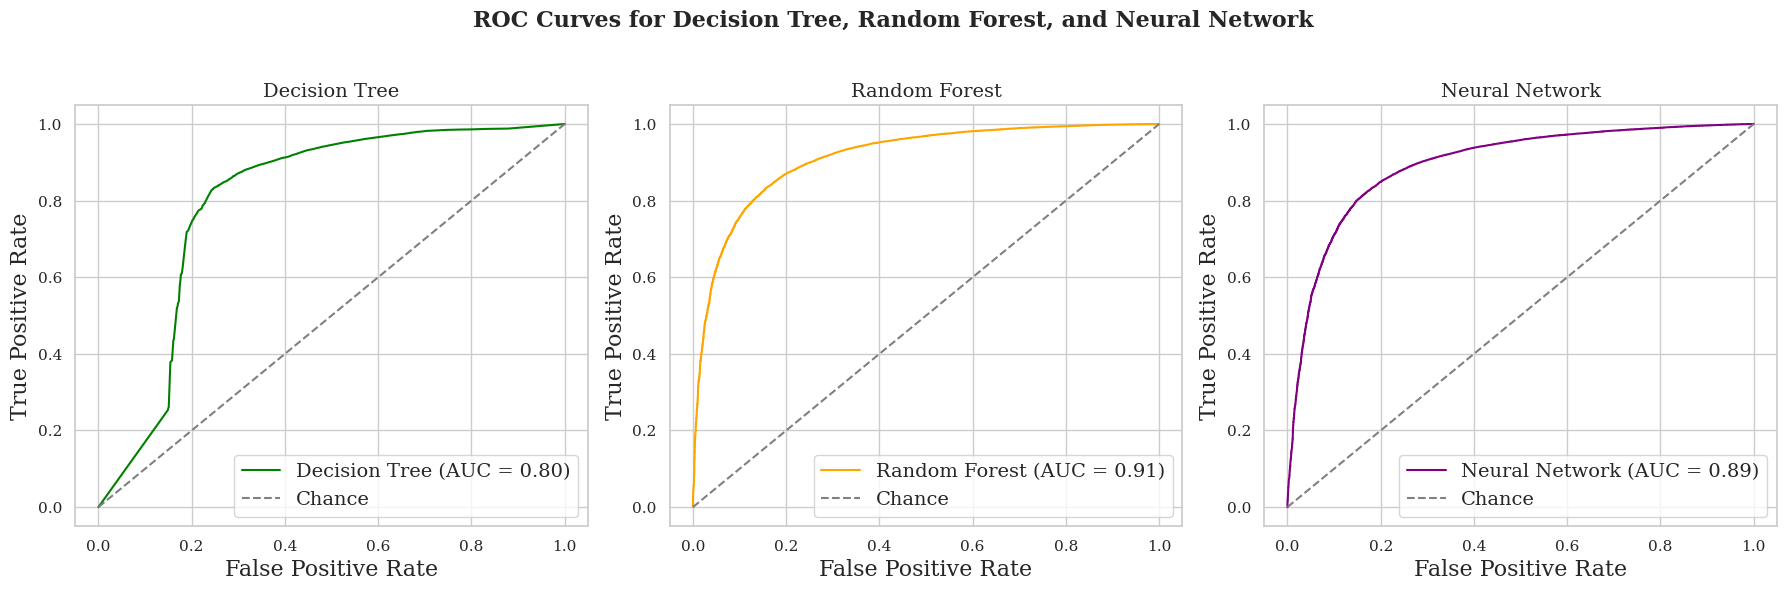

In [122]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Create subplots for each model's ROC curve
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# List of models and colors
models = [(best_model_dt, 'green', 'Decision Tree'), 
          (best_model_rf, 'orange', 'Random Forest'), 
          (best_model_neuralnet, 'purple', 'Neural Network')]

# Loop through each model
for i, (model, color, name) in enumerate(models):
    if name == 'Neural Network':
        # Get predicted probabilities for the positive class
        y_scores = model.predict(X_test_scaled_df)  # This gives probabilities
        RocCurveDisplay.from_predictions(y_test, y_scores, name=name, color=color, ax=axs[i])
    elif name == 'Random Forest':
        # Get predicted probabilities for the positive class
        y_scores = model.predict_proba(X_test_scaled_df)[:, 1]  # Use probabilities for AUC
        RocCurveDisplay.from_predictions(y_test, y_scores, name=name, color=color, ax=axs[i])
    else:
        # For Decision Tree, use from_estimator
        y_scores = model.predict_proba(X_test_scaled_df)[:, 1]  # For AUC
        RocCurveDisplay.from_estimator(model, X_test_scaled_df, y_test, name=name, color=color, ax=axs[i])

    axs[i].plot([0, 1], [0, 1], color='grey', linestyle='--', label='Chance')
    axs[i].set_title(name)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_scores)  # Use predicted probabilities for AUC

    # # Annotate AUC score on the plot
    # axs[i].text(0.5, 0.1, f'AUC = {auc_score:.2f}', horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)

# Common title and layout adjustments
fig.suptitle('ROC Curves for Decision Tree, Random Forest, and Neural Network', fontsize=16, fontweight='bold')
for ax in axs:
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')

# Adjust layout to accommodate the common title
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Key takeaways:

Best performing model:

1. As seen earlier, the **Random Forest model performs the best**, even beyond our initial measure of accuracy:

* This model has the highest AUC score of 0.91. This means that, across all thresholds for classification, this model had the highest overall performance
* The furthest point from the chance line (where the ROC curve is closer to the top-left corner) can give us the 'optimal threshold' for classification, although not the exact mathematical value:

- For example, this is around 0.25 across all of our models (roughly)
- This threshold for classification provides the best trade-off between identifying positive instances ('High Job Satisfaction'') indicated by the high True Positive Rate, and minimising false alarms (low False Positive Rate)

2. All models do reasonably well, and are certainly better than 'random guessing', given distance away from the chance line

* This suggests that next steps can involve further hyperparameter tuning to prevent overfitting especially for the Neural Network model

# 5. Recommendations for future improvement:

Inspecting the confusion matrix for each model is crucial to understand how well the models differentiate between the two classes: 'Low Satisfaction' (Class 0) and 'High Satisfaction' (Class 1). By analysing the true positives, false positives, true negatives, and false negatives, we can identify areas where the model performs well and where it struggles, helping to inform future improvements.

## Let's start with our best performing model, Random Forest:

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.7s finished


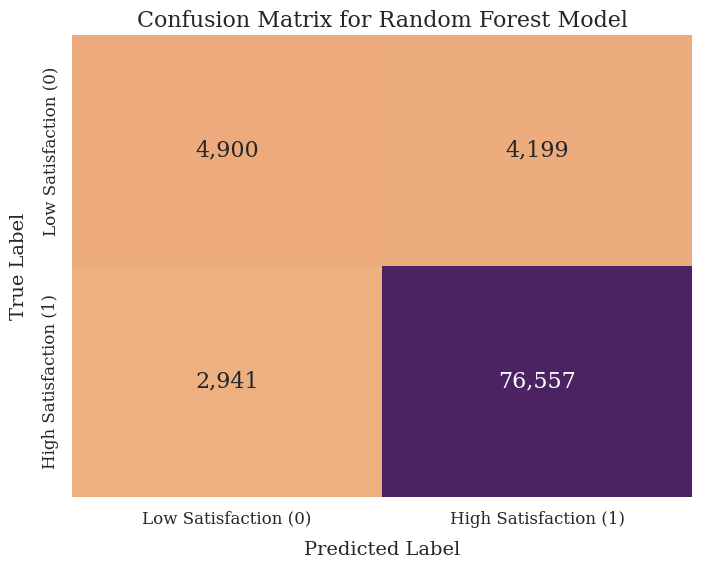

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to format the values in the heatmap
def format_heatmap_value(value):
    return f'{int(value):,}'

# Step 1: Confusion Matrix for Random Forest
y_scores_rf = best_model_rf.predict_proba(X_test_scaled_df)[:, 1]  # Get predicted probabilities
y_pred_rf = (y_scores_rf >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='flare',  # Use 'flare' colormap
            annot_kws={"size": 16},  # Increase font size of annotations
            cbar=False,  # Hide the color scale
            xticklabels=['Low Satisfaction (0)', 'High Satisfaction (1)'],
            yticklabels=['Low Satisfaction (0)', 'High Satisfaction (1)'])
plt.title('Confusion Matrix for Random Forest Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14, labelpad=10)  # Increase spacing
plt.ylabel('True Label', fontsize=14, labelpad=10)  # Increase spacing
plt.xticks(fontsize=12)  # Adjust x-axis tick font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size

# Format the values in the heatmap with thousands separators
for text in plt.gca().texts:
    text.set_text(format_heatmap_value(text.get_text()))

plt.show()


### Random Forest: Key Takeaways

- **True Positives (Class 1)**: The Random Forest model predicts **76,557** instances of 'High Satisfaction' correctly, which shows strong performance in identifying the majority class.
- **False Negatives (Class 1)**: It misses **2,941** actual 'High Satisfaction' cases, which slightly affects recall but is still a manageable error given the majority class size.
- **True Negatives (Class 0)**: The model correctly identifies **4,900** instances of 'Low Satisfaction', indicating it can somewhat capture the minority class.
- **False Positives (Class 0)**: The model incorrectly classifies **4,199** instances of 'Low Satisfaction' as 'High Satisfaction', revealing a challenge in correctly identifying the minority class, impacting precision for Class 0.

**Summary**: The Random Forest performs well in predicting 'High Satisfaction' but struggles with 'Low Satisfaction', primarily due to the high number of false positives. Improving minority class precision could significantly enhance model performance.

## What about our neural network model?

2769/2769 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step


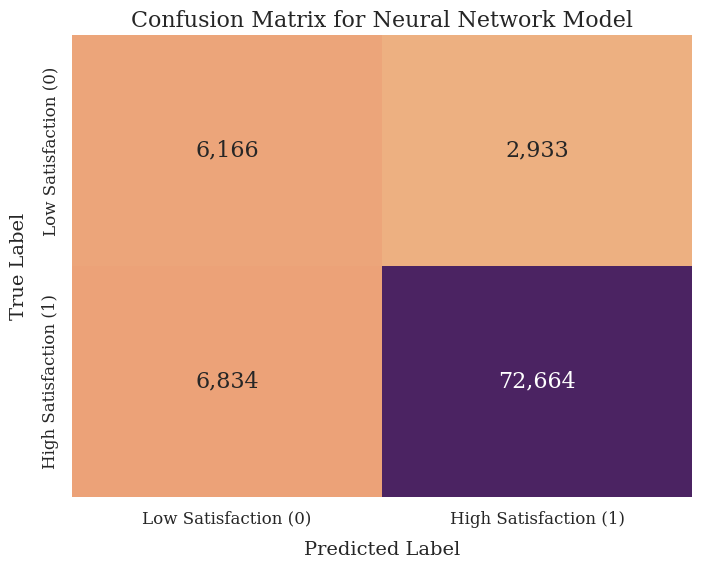

In [124]:
# Step 2: Confusion Matrix for Neural Network
y_scores_nn = best_model_neuralnet.predict(X_test_scaled_df)  # Get predicted probabilities
y_pred_nn = (y_scores_nn >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot confusion matrix for Neural Network
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='flare',  # Use 'flare' colormap
            annot_kws={"size": 16},  # Increase font size of annotations
            cbar=False,  # Hide the color scale
            xticklabels=['Low Satisfaction (0)', 'High Satisfaction (1)'],
            yticklabels=['Low Satisfaction (0)', 'High Satisfaction (1)'])
plt.title('Confusion Matrix for Neural Network Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14, labelpad=10)  # Increase spacing
plt.ylabel('True Label', fontsize=14, labelpad=10)  # Increase spacing
plt.xticks(fontsize=12)  # Adjust x-axis tick font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size

# Format the values in the heatmap with thousands separators
for text in plt.gca().texts:
    text.set_text(format_heatmap_value(text.get_text()))

plt.show()

### Neural Network: Key Takeaways

- **True Positives (Class 1)**: The Neural Network correctly identifies **72,664** instances of 'High Satisfaction', which is lower than the Random Forest but still strong.
- **False Negatives (Class 1)**: It misses **6,834** 'High Satisfaction' cases, which suggests the model has more difficulty with recall for the majority class compared to Random Forest.
- **True Negatives (Class 0)**: The model successfully identifies **6,166** 'Low Satisfaction' cases, showing improvement over the Random Forest in correctly identifying the minority class.
- **False Positives (Class 0)**: It incorrectly predicts **2,933** 'Low Satisfaction' cases as 'High Satisfaction', indicating better precision for Class 0 compared to the Random Forest.

**Summary**: The Neural Network shows better performance in predicting 'Low Satisfaction' with fewer false positives, but at the cost of a higher number of false negatives for 'High Satisfaction.' This indicates a trade-off between precision for Class 0 and recall for Class 1.


# Comparison and next steps

### Overall recommendations for improving model performance

Given that class imbalance techniques (such as SMOTE) have already been applied, our next steps should focus on **refining and optimising hyperparameters** using robust approaches like **RandomizedSearchCV** for broader exploration and **GridSearchCV** for fine-tuning. Below are specific recommendations for improving performance through better hyperparameter tuning approaches and alternative models:

#### 1. Hyperparameter Tuning for Random Forest:

- **RandomizedSearchCV**: This approach is ideal for exploring a wide range of hyperparameters without the computational intensity of an exhaustive search. We can use this to identify key hyperparameters such as tree depth, number of trees, and sample sizes that offer a good trade-off between model complexity and performance.
  
- **GridSearchCV**: After narrowing down promising ranges through RandomizedSearchCV, we can apply **GridSearchCV** to more precisely fine-tune specific hyperparameters. This approach works well once a range has been identified, allowing for an exhaustive search within smaller parameter spaces, ensuring optimal model performance.

#### 2. Hyperparameter Tuning for Neural Network:

- **RandomizedSearchCV**: Neural Networks involve multiple key hyperparameters (learning rate, dropout rate, batch size, etc.), and RandomizedSearchCV provides a more efficient way to explore these combinations broadly. This can help identify ranges of values that yield the best performance in terms of both precision and recall.
  
- **GridSearchCV**: Once we’ve identified potential ranges through RandomizedSearchCV, use **GridSearchCV** to more rigorously tune these parameters. This focused search will help achieve the best balance between model generalization and overfitting, especially when optimizing dropout, regularization, and learning rates.

#### 3. Consider Alternative Models:

- **Gradient Boosting (e.g., XGBoost, LightGBM)**: These models are well-suited for handling imbalanced datasets and often outperform Random Forests in many cases. We might start with **RandomizedSearchCV** to explore a broad range of hyperparameters (e.g., boosting rounds, learning rates, tree depth) and then fine-tune with **GridSearchCV** once the optimal ranges have been identified.

- **Threshold Tuning**: Consider adjusting the decision threshold for classification. Instead of using the default threshold (e.g., 0.5), use **precision-recall curves** to find an optimal threshold that minimizes false positives for 'Low Satisfaction' while maintaining high recall for 'High Satisfaction.'

#### 4. Hyperparameter Search Techniques: Computational Considerations

- **RandomizedSearchCV**: This technique is more computationally efficient for high-dimensional hyperparameter spaces. It allows for exploration of different combinations of hyperparameters while reducing the computational cost by sampling a fixed number of parameter settings from a larger space.
  
- **GridSearchCV**: Once RandomizedSearchCV has identified promising parameter ranges, use **GridSearchCV** for exhaustive tuning within these ranges. This is especially useful when the search space has been sufficiently narrowed down to a few potential values.
  
- **Early Stopping**: For Neural Networks, continue to experiment with and implement **early stopping** to prevent overfitting and save computational resources. 

---

### Specific Next Steps:

Due to computational constraints, moving forward we want to consider more in-depth RandomizedSearchCV and GridSearchCV to tune our models further:

1. **Random Forest**: Implement **RandomizedSearchCV** to explore a wide parameter space, then refine with **GridSearchCV** for optimal performance. Focus on tuning key parameters such as tree depth, number of estimators, and minimum samples per split.
   
2. **Neural Network**: Use **RandomizedSearchCV** to explore combinations of learning rates, dropout rates, batch sizes, and regularisation strengths. After identifying promising ranges, apply **GridSearchCV** for more precise optimization. Use **early stopping** to prevent overfitting and dynamically adjust the number of training epochs.

3. **Gradient Boosting Models**: Consider introducing models like **XGBoost** or **LightGBM**, which handle imbalanced data well and can potentially outperform Random Forests. Begin with **RandomizedSearchCV** for broad hyperparameter exploration, followed by **GridSearchCV** for fine-tuning.

4. **Threshold Tuning**: Use precision-recall curves to identify and adjust the decision threshold for predicting 'Low Satisfaction' to optimize precision without sacrificing too much recall.

By applying these robust hyperparameter tuning strategies and leveraging **RandomizedSearchCV** and **GridSearchCV** appropriately, model performance can be enhanced, particularly in balancing precision and recall for both the majority and minority classes. However, this will be dependent on our computational resources - ideally GridSearchCV would be the most robust way forward, but requires signifciant time and computing power.

We can now move onto our final findings and interpretation: **['10 Summary of findings and next steps.ipynb'](../notebooks/10%20Summary%20of%20findings%20and%20next%20steps.ipynb)**
